In [2]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from utils import utils
from utils import dbm_math

In [3]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
data1 = utils.read_mat("/home/matthias/WS_all/dbm/raw/ex3_handout/ex3_system1_data.mat")
data2 = utils.read_mat("/home/matthias/WS_all/dbm/raw/ex3_handout/ex3_system2_data.mat")

display(data1.keys())
display(data2.keys())

dict_keys(['None', 'README', 't1', 't2', 'u1', 'u2', 'y1', 'y2'])

dict_keys(['README', 't1', 't2', 't3', 'u1', 'u2', 'u3', 'y1', 'y2', 'y3'])

In [5]:
# Constant3
NA = 6
NB = 4

HA_NUM = 6

def func(x,p):
    return x ** p

HA_FUN = func

In [6]:
# Data
t = jnp.array(data2.t1)
y = jnp.array(data2.y1)
u = jnp.array(data2.u1)
Ts = t[1] - t[0]


In [21]:
na_range = jnp.array([3,6])
nb_range = jnp.array([3,6])
order_ = jnp.array([2,7])
num_polys = jnp.array([1,3])
scalers_poly = jnp.array([0.2,0.8])


p_hat,loss, func, order, na,nb = dbm_math.hammerstein_optimization(y,u,(3,4),(4,5),(5,6),(1,3),(0.2,0.8))

Total parameters: 170
Progress: 59.41 %
Estimated optimization time left: 34.69s
Current iteration time: 0.50s


In [22]:
print("Loss", loss)
print("Func", func)
print("Order", order)
y_pred = dbm_math.hammerstein_sim(y[:NA], u, na, nb, order, func, p_hat)

Loss 0.2618475
Func functools.partial(<PjitFunction of <function _polynomial at 0x7bbe2d5ed3a0>>, array=Array([0.65000004], dtype=float32))
Order 6


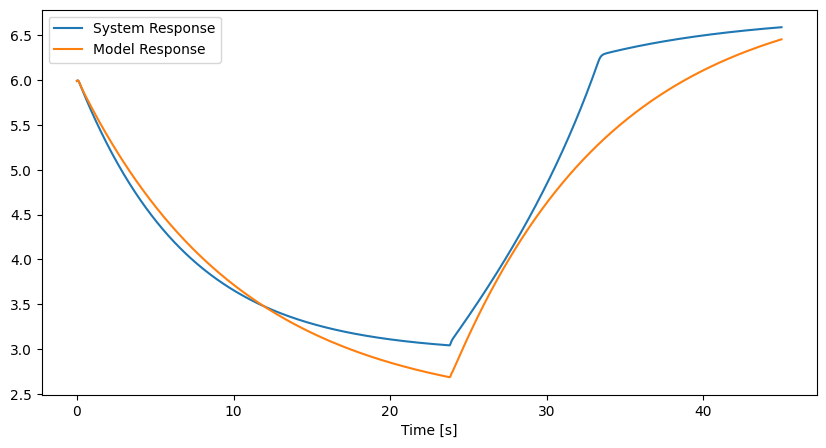

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(t,y, label="System Response")
plt.xlabel("Time [s]")
plt.plot(t, y_pred,label="Model Response")
plt.legend()
plt.show()
